In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA, TruncatedSVD
import matplotlib.patches as mpatches
import time
from sklearn.preprocessing import StandardScaler

In [2]:
pd.set_option('display.max_columns', None)
df_td = pd.read_csv('tic_2000_train_data.csv')

In [3]:
df_td.CARAVAN.value_counts()

0    5474
1     348
Name: CARAVAN, dtype: int64

In [4]:
df_td.head()

MOSTYPE  MAANTHUI  MGEMOMV  MGEMLEEF  MOSHOOFD  MGODRK  MGODPR  MGODOV  \
0       33         1        3         2         8       0       5       1   
1       37         1        2         2         8       1       4       1   
2       37         1        2         2         8       0       4       2   
3        9         1        3         3         3       2       3       2   
4       40         1        4         2        10       1       4       1   

   MGODGE  MRELGE  MRELSA  MRELOV  MFALLEEN  MFGEKIND  MFWEKIND  MOPLHOOG  \
0       3       7       0       2         1         2         6         1   
1       4       6       2       2         0         4         5         0   
2       4       3       2       4         4         4         2         0   
3       4       5       2       2         2         3         4         3   
4       4       7       1       2         2         4         4         5   

   MOPLMIDD  MOPLLAAG  MBERHOOG  MBERZELF  MBERBOER  MBERMIDD  MBERARBG  \
0         2         7         1         0         1         2         5   
1         5         4         0         0         0         5         0   
2         5         4         0         0         0         7         0   
3         4         2         4         0         0         3         1   
4         4         0         0         5         4         0         0   

   MBERARBO  MSKA  MSKB1  MSKB2  MSKC  MSKD  MHHUUR  MHKOOP  MAUT1  MAUT2  \
0         2     1      1      2     6     1       1       8      8      0   
1         4     0      2      3     5     0       2       7      7      1   
2         2     0      5      0     4     0       7       2      7      0   
3         2     3      2      1     4     0       5       4      9      0   
4         0     9      0      0     0     0       4       5      6      2   

   MAUT0  MZFONDS  MZPART  MINKM30  MINK3045  MINK4575  MINK7512  MINK123M  \
0      1        8       1        0         4         5         0         0   
1      2        6       3        2         0         5         2         0   
2      2        9       0        4         5         0         0         0   
3      0        7       2        1         5         3         0         0   
4      1        5       4        0         0         9         0         0   

   MINKGEM  MKOOPKLA  PWAPART  PWABEDR  PWALAND  PPERSAUT  PBESAUT  PMOTSCO  \
0        4         3        0        0        0         6        0        0   
1        5         4        2        0        0         0        0        0   
2        3         4        2        0        0         6        0        0   
3        4         4        0        0        0         6        0        0   
4        6         3        0        0        0         0        0        0   

   PVRAAUT  PAANHANG  PTRACTOR  PWERKT  PBROM  PLEVEN  PPERSONG  PGEZONG  \
0        0         0         0       0      0       0         0        0   
1        0         0         0       0      0       0         0        0   
2        0         0         0       0      0       0         0        0   
3        0         0         0       0      0       0         0        0   
4        0         0         0       0      0       0         0        0   

   PWAOREG  PBRAND  PZEILPL  PPLEZIER  PFIETS  PINBOED  PBYSTAND  AWAPART  \
0        0       5        0         0       0        0         0        0   
1        0       2        0         0       0        0         0        2   
2        0       2        0         0       0        0         0        1   
3        0       2        0         0       0        0         0        0   
4        0       6        0         0       0        0         0        0   

   AWABEDR  AWALAND  APERSAUT  ABESAUT  AMOTSCO  AVRAAUT  AAANHANG  ATRACTOR  \
0        0        0         1        0        0        0         0         0   
1        0        0         0        0        0        0         0         0   
2        0        0         1        0        0        0   

In [5]:
pre_enc = ['MOSTYPE', 'MGEMLEEF', 'MOSHOOFD', 'MGODRK', 'PWAPART']

In [6]:
post_enc_df = pd.get_dummies(df_td, prefix_sep="_", columns=pre_enc)

In [7]:
post_enc_df

MAANTHUI  MGEMOMV  MGODPR  MGODOV  MGODGE  MRELGE  MRELSA  MRELOV  \
0            1        3       5       1       3       7       0       2   
1            1        2       4       1       4       6       2       2   
2            1        2       4       2       4       3       2       4   
3            1        3       3       2       4       5       2       2   
4            1        4       4       1       4       7       1       2   
...        ...      ...     ...     ...     ...     ...     ...     ...   
5817         1        1       6       1       2       1       2       6   
5818         1        4       4       1       4       6       0       3   
5819         1        3       6       0       3       5       1       4   
5820         1        3       7       0       2       7       2       0   
5821         1        3       6       1       2       7       1       2   

      MFALLEEN  MFGEKIND  MFWEKIND  MOPLHOOG  MOPLMIDD  MOPLLAAG  MBERHOOG  \
0            1         2         6         1         2         7         1   
1            0         4         5         0         5         4         0   
2            4         4         2         0         5         4         0   
3            2         3         4         3         4         2         4   
4            2         4         4         5         4         0         0   
...        ...       ...       ...       ...       ...       ...       ...   
5817         5         3         2         2         5         2         2   
5818         2         2         5         0         0         9         2   
5819         3         3         4         0         1         8         1   
5820         0         4         5         0         2         7         0   
5821         1         4         4         1         2         6         1   

      MBERZELF  MBERBOER  MBERMIDD  MBERARBG  MBERARBO  MSKA  MSKB1  MSKB2  \
0            0         1         2         5         2     1      1      2   
1            0         0         5         0         4     0      2      3   
2            0         0         7         0         2     0      5      0   
3            0         0         3         1         2     3      2      1   
4            5         4         0         0         0     9      0      0   
...        ...       ...       ...       ...       ...   ...    ...    ...   
5817         0         0         4         1         3     2      3      3   
5818         1         1         3         3         2     0      4      5   
5819         0         0         2         3         5     1      1      1   
5820         2         0         2         4         2     0      0      4   
5821         0         1         3         2         4     1      1      2   

      MSKC  MSKD  MHHUUR  MHKOOP  MAUT1  MAUT2  MAUT0  MZFONDS  MZPART  \
0        6     1       1       8      8      0      1        8       1   
1        5     0       2       7      7      1      2        6       3   
2        4     0       7       2      7      0      2        9       0   
3        4     0       5       4      9      0      0        7       2   
4        0     0       4       5      6      2      1        5       4   
...    ...   ...     ...     ...    ...    ...    ...      ...     ...   
5817     3     0       9       0      5      1      3        5       4   
5818     0     0       3       6      6      1      2        6       3   
5819     4     4       7       2      4      0      5        8       1   
5820     5     0       2       7      5      4      0        9       0   
5821     6     1       5       4      5      2      3        6       3   

      MINKM30  MINK3045  MINK4575  MINK7512  MINK123M  MINKGEM  MKOOPKLA  \
0           0         4         5         0         0        4         3   
1           2         0         5         2         0        5         4   
2           4         5         0         0         0        3         4   
3           1         5         3     

In [8]:
train_feat = post_enc_df.drop('CARAVAN', axis=1)

In [9]:
train_feat

MAANTHUI  MGEMOMV  MGODPR  MGODOV  MGODGE  MRELGE  MRELSA  MRELOV  \
0            1        3       5       1       3       7       0       2   
1            1        2       4       1       4       6       2       2   
2            1        2       4       2       4       3       2       4   
3            1        3       3       2       4       5       2       2   
4            1        4       4       1       4       7       1       2   
...        ...      ...     ...     ...     ...     ...     ...     ...   
5817         1        1       6       1       2       1       2       6   
5818         1        4       4       1       4       6       0       3   
5819         1        3       6       0       3       5       1       4   
5820         1        3       7       0       2       7       2       0   
5821         1        3       6       1       2       7       1       2   

      MFALLEEN  MFGEKIND  MFWEKIND  MOPLHOOG  MOPLMIDD  MOPLLAAG  MBERHOOG  \
0            1         2         6         1         2         7         1   
1            0         4         5         0         5         4         0   
2            4         4         2         0         5         4         0   
3            2         3         4         3         4         2         4   
4            2         4         4         5         4         0         0   
...        ...       ...       ...       ...       ...       ...       ...   
5817         5         3         2         2         5         2         2   
5818         2         2         5         0         0         9         2   
5819         3         3         4         0         1         8         1   
5820         0         4         5         0         2         7         0   
5821         1         4         4         1         2         6         1   

      MBERZELF  MBERBOER  MBERMIDD  MBERARBG  MBERARBO  MSKA  MSKB1  MSKB2  \
0            0         1         2         5         2     1      1      2   
1            0         0         5         0         4     0      2      3   
2            0         0         7         0         2     0      5      0   
3            0         0         3         1         2     3      2      1   
4            5         4         0         0         0     9      0      0   
...        ...       ...       ...       ...       ...   ...    ...    ...   
5817         0         0         4         1         3     2      3      3   
5818         1         1         3         3         2     0      4      5   
5819         0         0         2         3         5     1      1      1   
5820         2         0         2         4         2     0      0      4   
5821         0         1         3         2         4     1      1      2   

      MSKC  MSKD  MHHUUR  MHKOOP  MAUT1  MAUT2  MAUT0  MZFONDS  MZPART  \
0        6     1       1       8      8      0      1        8       1   
1        5     0       2       7      7      1      2        6       3   
2        4     0       7       2      7      0      2        9       0   
3        4     0       5       4      9      0      0        7       2   
4        0     0       4       5      6      2      1        5       4   
...    ...   ...     ...     ...    ...    ...    ...      ...     ...   
5817     3     0       9       0      5      1      3        5       4   
5818     0     0       3       6      6      1      2        6       3   
5819     4     4       7       2      4      0      5        8       1   
5820     5     0       2       7      5      4      0        9       0   
5821     6     1       5       4      5      2      3        6       3   

      MINKM30  MINK3045  MINK4575  MINK7512  MINK123M  MINKGEM  MKOOPKLA  \
0           0         4         5         0         0        4         3   
1           2         0         5         2         0        5         4   
2           4         5         0         0         0        3         4   
3           1         5         3     

In [10]:
target_feat = post_enc_df.CARAVAN

In [11]:
# Separating out the features
x = train_feat
# Separating out the target
y = target_feat

In [12]:
print(x.shape)
print(y.shape)

(5822, 150)
(5822,)


In [13]:
# sliced the data into its main features

# Run PCA to find components

In [14]:
#First split the data and create upsampled data set.
from sklearn.model_selection import train_test_split
from sklearn.utils import resample

#Create training data
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state = 42)

# Performing standardization before applying PCA
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
print(X_train)

[[-0.27024869 -0.86501025 -0.95368148 ... -0.18801341 -0.76139022
  -0.04638886]
 [-0.27024869  0.40496224 -1.54014585 ... -0.18801341  1.31338698
  -0.04638886]
 [-0.27024869  0.40496224 -0.36721711 ... -0.18801341  1.31338698
  -0.04638886]
 ...
 [-0.27024869 -0.86501025 -1.54014585 ... -0.18801341  1.31338698
  -0.04638886]
 [-0.27024869  0.40496224 -0.95368148 ... -0.18801341 -0.76139022
  -0.04638886]
 [-0.27024869  1.67493472 -0.36721711 ...  5.31876942 -0.76139022
  -0.04638886]]


In [15]:
pca = PCA(.95)
pca.fit(X_train)

PCA(copy=True, iterated_power='auto', n_components=153, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

PCA(n_components=153)

In [16]:
## It will give eigen values
print(pca.explained_variance_)

X_train_pca = pca.transform(X_train)
print("original shape:   ", X_train.shape)
print("transformed shape:", X_train_pca.shape)

X_test_pca = pca.transform(X_test)
print("original shape:   ", X_test.shape)
print("transformed shape:", X_test_pca.shape)

[10.19024252  5.78948091  4.45114047  4.13290243  3.7265447   3.06256496
  2.7932143   2.61538126  2.59823448  2.48342039  2.36922275  2.29612496
  2.25897054  2.23712575  2.14555713  2.1294511   2.06742581  2.02008343
  1.97528097  1.93674617  1.8581313   1.81792785  1.80882772  1.79754261
  1.78317379  1.73364032  1.67928828  1.65674467  1.63500288  1.5946143
  1.55401538  1.52856853  1.49394442  1.48174966  1.44103675  1.40031634
  1.36974353  1.36086152  1.34540995  1.32842368  1.26665952  1.25785546
  1.22216661  1.19183384  1.17559565  1.1619928   1.15450361  1.1425563
  1.12427252  1.10629146  1.09864772  1.08672914  1.08049325  1.06827282
  1.06071046  1.04416356  1.04021316  1.03805489  1.02857011  1.01718742
  1.00951573  1.00717663  0.99788015  0.98733187  0.97017721  0.96741979
  0.96110096  0.94727379  0.93475379  0.92619734  0.9174482   0.90274749
  0.89698113  0.87575993  0.86302427  0.85471616  0.84253283  0.83567252
  0.81813618  0.80947889  0.79246427  0.77729257  0.7

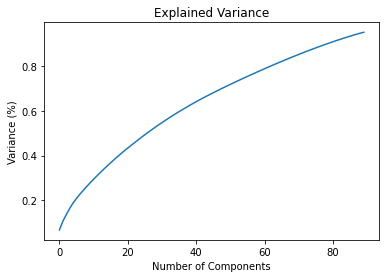

In [17]:
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Variance (%)') 
plt.title('Explained Variance')
plt.show()

In [18]:
features_n = range(pca.n_components_)
pd.DataFrame(pca.components_, columns=x.columns, index=['pc_1', 'pc_2', 'pc_3','pc_4','pc_5','pc_6','pc_7','pc_8','pc_9','pc_10','pc_11','pc_12','pc_13','pc_14',
                         'pc_15','pc_16','pc_17','pc_18','pc_19','pc_20','pc_21','pc_22','pc_23','pc_24','pc_25','pc_26','pc_27','pc_28',
                         'pc_29','pc_30','pc_31','pc_32','pc_33','pc_34','pc_35','pc_36','pc_37','pc_38','pc_39','pc_40','pc_41','pc_42','pc_43','pc_44','pc_45','pc_46', 'pc_47', 'pc_48','pc_49','pc_50','pc_51','pc_52','pc_53','pc_54','pc_55','pc_56','pc_57','pc_58','pc_59','pc_60','pc_61','pc_62','pc_63','pc_64','pc_65','pc_66','pc_67','pc_68','pc_69','pc_70','pc_71','pc_72','pc_73','pc_74','pc_75','pc_76','pc_77','pc_78','pc_79','pc_80','pc_81','pc_82','pc_83','pc_84','pc_85','pc_86','pc_87','pc_88','pc_89','pc_90'])

MAANTHUI   MGEMOMV    MGODPR    MGODOV    MGODGE    MRELGE    MRELSA  \
pc_1   0.003896 -0.139827 -0.028524  0.035967  0.048076 -0.175967  0.046145   
pc_2   0.028827 -0.237131 -0.101996  0.067363  0.029763 -0.231098  0.104007   
pc_3  -0.002951 -0.084462  0.078118 -0.022945 -0.060006 -0.058748 -0.061677   
pc_4   0.006396  0.007904  0.032543 -0.004560 -0.028595 -0.005333  0.010724   
pc_5  -0.060890  0.062122 -0.126547  0.060485  0.094702 -0.082610  0.200569   
...         ...       ...       ...       ...       ...       ...       ...   
pc_86 -0.030394 -0.027405 -0.072315  0.023522  0.009951 -0.043970 -0.089088   
pc_87 -0.068079  0.024408  0.010965  0.200514 -0.076153  0.040728 -0.096463   
pc_88  0.205454 -0.027423 -0.040998  0.201773  0.006142 -0.015138  0.036011   
pc_89 -0.108641  0.027398 -0.021308 -0.077111  0.027187  0.089903 -0.306923   
pc_90  0.069007  0.058458 -0.045766  0.071269 -0.009878  0.226158 -0.253104   

         MRELOV  MFALLEEN  MFGEKIND  MFWEKIND  MOPLHOOG  MOPLMIDD  MOPLLAAG  \
pc_1   0.176232  0.153690 -0.029844 -0.103875 -0.184179 -0.114607  0.210087   
pc_2   0.214223  0.248052  0.057836 -0.251763  0.189344  0.110981 -0.205606   
pc_3   0.100764  0.094836  0.059134 -0.119224  0.002241 -0.057339  0.037502   
pc_4  -0.000319 -0.004672 -0.017917  0.013788 -0.038397  0.005064  0.020364   
pc_5   0.004504 -0.003935 -0.068749  0.055846 -0.047862  0.219900 -0.127620   
...         ...       ...       ...       ...       ...       ...       ...   
pc_86  0.080756  0.116410 -0.009631 -0.085418  0.098903 -0.113450  0.021556   
pc_87  0.002264 -0.010724 -0.060428  0.048090  0.087485 -0.037136 -0.012940   
pc_88 -0.009669 -0.015965  0.036155 -0.019008 -0.040216 -0.111756  0.108208   
pc_89  0.043941 -0.083250  0.076150 -0.008094 -0.022879  0.195325 -0.136832   
pc_90 -0.131813 -0.032204  0.077015 -0.031605 -0.012547  0.156563 -0.132859   

       MBERHOOG  MBERZELF  MBERBOER  MBERMIDD  MBERARBG  MBERARBO      MSKA  \
pc_1  -0.193446 -0.077405 -0.007806 -0.045529  0.120829  0.168553 -0.202747   
pc_2   0.149094  0.050345 -0.086118  0.072341 -0.177256 -0.014183  0.135083   
pc_3   0.064555  0.062705  0.240970 -0.143833 -0.071039  0.013272  0.089814   
pc_4  -0.038256 -0.013590 -0.019933  0.024114  0.029750  0.002949 -0.051172   
pc_5  -0.108866 -0.094914 -0.041402  0.230278 -0.079623  0.012089 -0.106704   
...         ...       ...       ...       ...       ...       ...       ...   
pc_86  0.009304  0.061829  0.014607  0.108736 -0.092617 -0.064200  0.002258   
pc_87  0.077540  0.019571 -0.068021  0.014878  0.064105 -0.106200  0.116005   
pc_88 -0.069333  0.031986 -0.011691  0.133488 -0.014550 -0.050018 -0.097154   
pc_89 -0.003101 -0.020348  0.059809 -0.046303 -0.044573  0.069348  0.043548   
pc_90  0.060820  0.043625  0.006551 -0.104144  0.061447 -0.038996  0.095993   

          MSKB1     MSKB2      MSKC      MSKD    MHHUUR    MHKOOP     MAUT1  \
pc_1  -0.073879 -0.054238  0.173462  0.157328  0.208562 -0.208528 -0.117060   
pc_2   0.102582  0.022071 -0.191790  0.006517  0.096460 -0.096459 -0.087634   
pc_3  -0.064631  0.041560 -0.094137  0.044547 -0.069751  0.070157 -0.133719   
pc_4   0.015527 -0.004910  0.036952 -0.011058 -0.012033  0.012014  0.027046   
pc_5   0.201188  0.099992 -0.033868 -0.104023  0.082723 -0.083687  0.053345   
...         ...       ...       ...       ...       ...       ...       ...   
pc_86  0.177431  0.003196 -0.079032 -0.065786 -0.115626  0.115376  0.047422   
pc_87 -0.114099 -0.022591  0.027454 -0.014676  0.023580 -0.023301  0.082834   
pc_88 -0.054208  0.179141  0.054763 -0.098701 -0.010790  0.010282 -0.116366   
pc_89 -0.060455  0.012126  0.046747 -0.104929  0.263270 -0.262254 -0.122826   
pc_90  0.167504 -0.161965 -0.198388  0.217925 -0.158890  0.159449 -0.078116   

          MAUT2     MAUT0   MZFONDS    MZPART   MINKM30  MINK3045  MINK4575  \
pc_1  -0.090279  0.191094  0.214566 -0.214883  0.203398  0.055798 -0.181050   
pc_2  -0.085442  0.153206 -0.123112  0.122605  0.0875

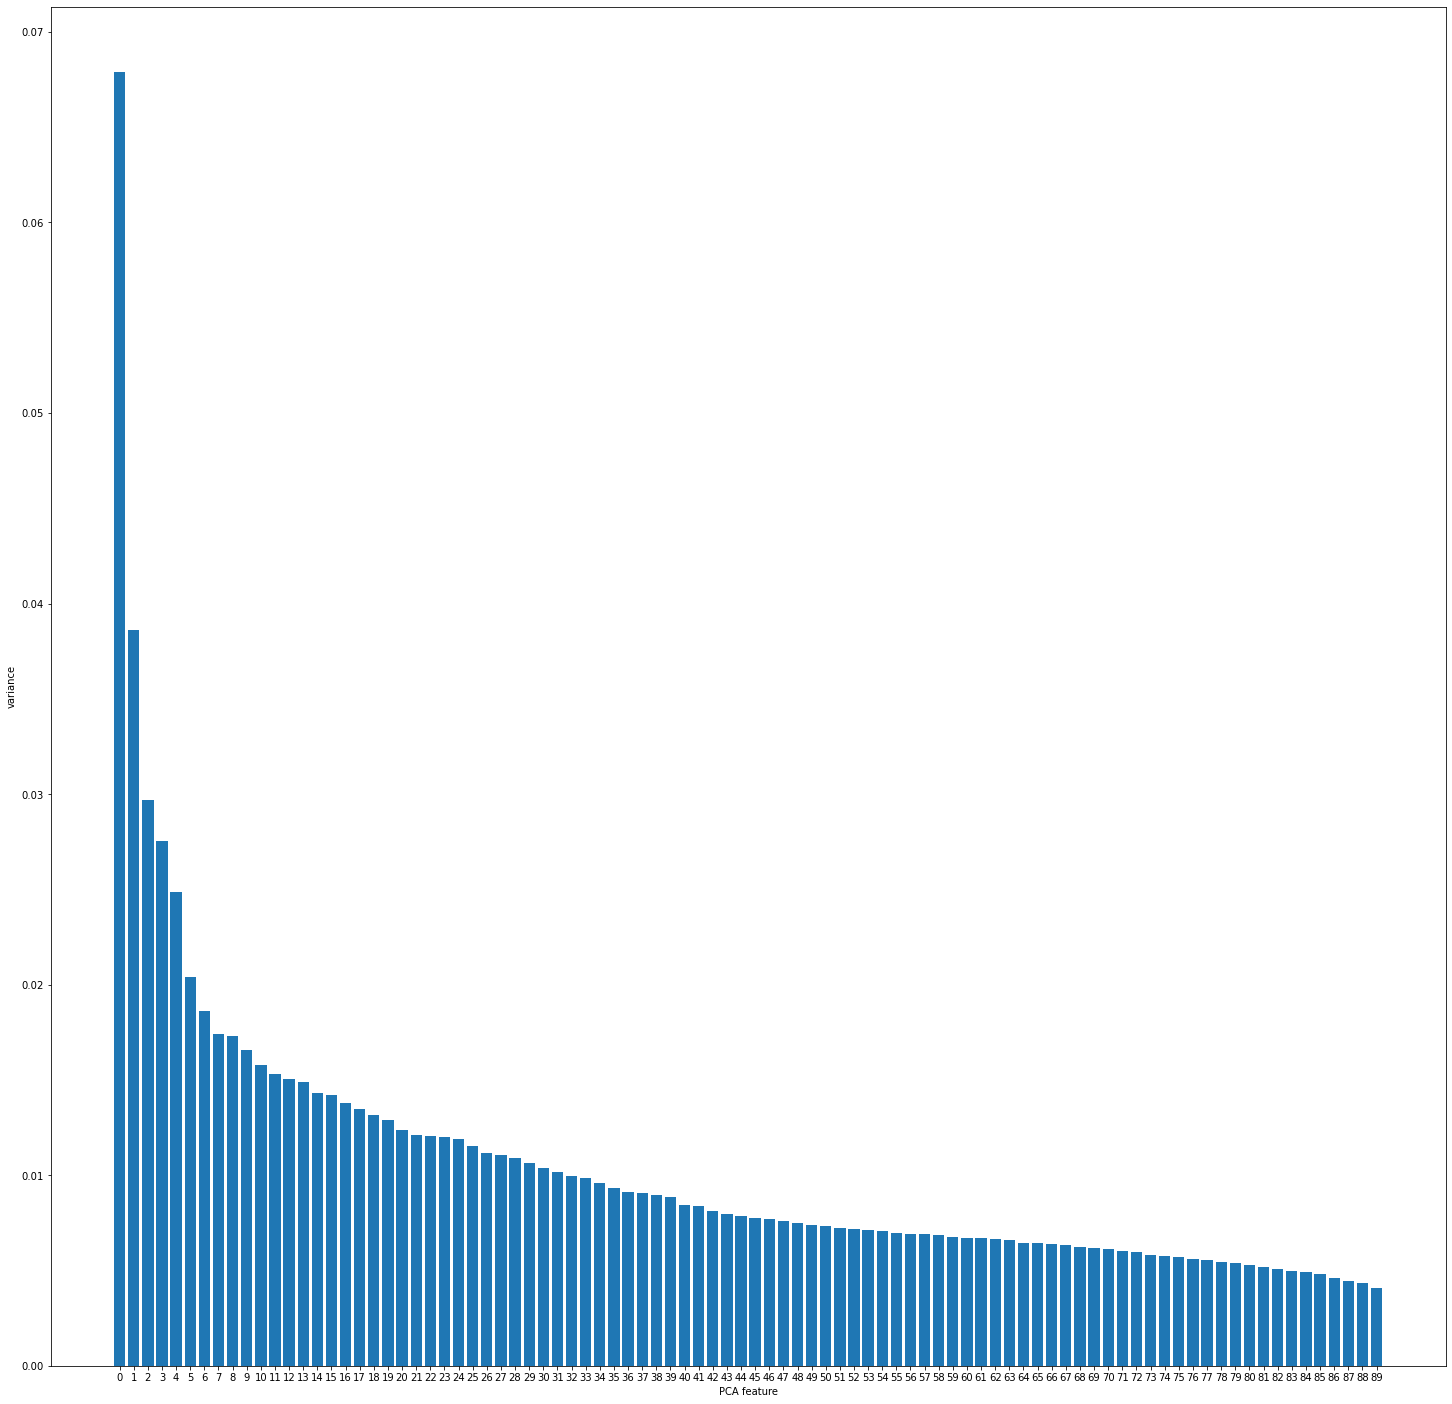

In [19]:
plt.figure(figsize=[25,25])
plt.bar(features_n, pca.explained_variance_ratio_)
plt.xlabel('PCA feature')
plt.ylabel('variance')
plt.xticks(features_n)
plt.show()

In [20]:
from sklearn.dummy import DummyClassifier
from sklearn.metrics import accuracy_score
baseline = DummyClassifier(random_state=0).fit(X_train_pca, y_train)
y_pred = baseline.predict(X_test_pca)
print(round(accuracy_score(y_test, y_pred),4))

0.8687


C:\Users\Threadripper\Anaconda3\lib\site-packages\sklearn\dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)


# Test different algorithms to get scores

KNeighborsClassifier(n_neighbors=3)
balanced_accuracy_score
 0.5165653045419343
model confusion matrix
 [[0.90386266 0.02660944]
 [0.06523605 0.00429185]]
classification_report
               precision    recall  f1-score   support

           0       0.93      0.97      0.95      1084
           1       0.14      0.06      0.09        81

    accuracy                           0.91      1165
   macro avg       0.54      0.52      0.52      1165
weighted avg       0.88      0.91      0.89      1165
 

SVC(C=0.025, probability=True)
balanced_accuracy_score
 0.5
model confusion matrix
 [[0.9304721 0.       ]
 [0.0695279 0.       ]]
classification_report
               precision    recall  f1-score   support

           0       0.93      1.00      0.96      1084
           1       0.00      0.00      0.00        81

    accuracy                           0.93      1165
   macro avg       0.47      0.50      0.48      1165
weighted avg       0.87      0.93      0.90      1165
 



C:\Users\Threadripper\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


DecisionTreeClassifier()
balanced_accuracy_score
 0.573316705389276
model confusion matrix
 [[0.76824034 0.16223176]
 [0.0472103  0.0223176 ]]
classification_report
               precision    recall  f1-score   support

           0       0.94      0.83      0.88      1084
           1       0.12      0.32      0.18        81

    accuracy                           0.79      1165
   macro avg       0.53      0.57      0.53      1165
weighted avg       0.89      0.79      0.83      1165
 

RandomForestClassifier()
balanced_accuracy_score
 0.5
model confusion matrix
 [[0.9304721 0.       ]
 [0.0695279 0.       ]]
classification_report
               precision    recall  f1-score   support

           0       0.93      1.00      0.96      1084
           1       0.00      0.00      0.00        81

    accuracy                           0.93      1165
   macro avg       0.47      0.50      0.48      1165
weighted avg       0.87      0.93      0.90      1165
 



C:\Users\Threadripper\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


AdaBoostClassifier()
balanced_accuracy_score
 0.5981162589403672
model confusion matrix
 [[0.79141631 0.13905579]
 [0.04549356 0.02403433]]
classification_report
               precision    recall  f1-score   support

           0       0.95      0.85      0.90      1084
           1       0.15      0.35      0.21        81

    accuracy                           0.82      1165
   macro avg       0.55      0.60      0.55      1165
weighted avg       0.89      0.82      0.85      1165
 

GradientBoostingClassifier()
balanced_accuracy_score
 0.5395881736595144
model confusion matrix
 [[0.88927039 0.04120172]
 [0.06094421 0.00858369]]
classification_report
               precision    recall  f1-score   support

           0       0.94      0.96      0.95      1084
           1       0.17      0.12      0.14        81

    accuracy                           0.90      1165
   macro avg       0.55      0.54      0.54      1165
weighted avg       0.88      0.90      0.89      1165
 

LinearDi

C:\Users\Threadripper\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


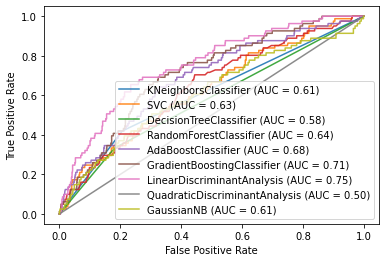

In [22]:
from sklearn.metrics import log_loss, confusion_matrix, plot_roc_curve, classification_report, balanced_accuracy_score, coverage_error
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC, NuSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB

classifiers = [
    KNeighborsClassifier(3),
    SVC(kernel="rbf", C=0.025, probability=True),
    DecisionTreeClassifier(),
    RandomForestClassifier(n_estimators=100),
    AdaBoostClassifier(),
    GradientBoostingClassifier(),
    LinearDiscriminantAnalysis(),
    QuadraticDiscriminantAnalysis(),
    GaussianNB()
    
    ]
#will not be using accuracy_score due to imbalanced data

for classifier in classifiers:
    model = classifier.fit(X_train_pca, y_train)
    predictions = classifier.predict(X_test_pca)
    print(classifier)
    print("balanced_accuracy_score" '\n', balanced_accuracy_score(y_test, predictions))
    print("model confusion matrix" '\n', confusion_matrix(y_test, predictions, normalize='all'))
    print("classification_report" '\n', classification_report(y_test, predictions),'\n')
    ax = plt.gca()
    disp = plot_roc_curve(classifier, X_test_pca, y_test, ax=ax, alpha=0.9)

# Data imbalance issue. Will adjust by Oversampling minority class and compare results

In [23]:
# separate minority and majority classes
no_policy = post_enc_df[post_enc_df.CARAVAN==0][:348]
has_policy = post_enc_df[post_enc_df.CARAVAN==1]

# upsample minority
has_pol_upsampled = resample(has_policy,
                          replace=True, # sample with replacement
                          n_samples=len(no_policy), # match number in majority class
                          random_state=27) # reproducible results

# combine majority and upsampled minority
upsampled = pd.concat([no_policy, has_pol_upsampled])

new_df = upsampled.sample(frac=1, random_state=42)

# check new class counts
new_df.CARAVAN.value_counts()

1    348
0    348
Name: CARAVAN, dtype: int64

In [24]:
y_train_up = new_df.CARAVAN
x_train_up = new_df.drop('CARAVAN', axis=1)

In [26]:
print(x_train_up.shape, y_train_up.shape)

(696, 150) (696,)


In [ ]:
X_train_up, X_test_up, y_train_up, y_test_up = train_test_split(x_train_up, y_train_up, test_size=0.2, random_state = 42)

# Performing standardization before applying PCA
scaler = StandardScaler()
scaler.fit(X_train_up)
X_train = scaler.transform(X_train_up)
print(X_train_up)

In [ ]:
pca = PCA(.95)
pca.fit(X_train_up)

PCA(copy=True, iterated_power='auto', n_components=153, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [ ]:
from sklearn.dummy import DummyClassifier
from sklearn.metrics import accuracy_score
baseline = DummyClassifier(random_state=0).fit(X_train_up, y_train_up)
y_pred = baseline.predict(X_test)
print(round(accuracy_score(y_test, y_pred),4))

#Below is the regular sampled data 

# Below is the oversampled data

In [ ]:
from sklearn.metrics import log_loss, confusion_matrix, plot_roc_curve, classification_report, balanced_accuracy_score, coverage_error
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC, NuSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB

classifiers = [
    KNeighborsClassifier(3),
    SVC(kernel="rbf", C=0.025, probability=True),
    DecisionTreeClassifier(),
    RandomForestClassifier(n_estimators=100),
    AdaBoostClassifier(),
    GradientBoostingClassifier(),
    LinearDiscriminantAnalysis(),
    QuadraticDiscriminantAnalysis(),
    GaussianNB()
    
    ]
#will not be using accuracy_score due to imbalanced data

for classifier in classifiers:
    model = classifier.fit(X_train_up, y_train_up)
    predictions = classifier.predict(X_test)
    print(classifier)
    print("balanced_accuracy_score" '\n', balanced_accuracy_score(y_test, predictions))
    print("model confusion matrix" '\n', confusion_matrix(y_test, predictions, normalize='all'))
    print("classification_report" '\n', classification_report(y_test, predictions),'\n')
    ax = plt.gca()
    disp = plot_roc_curve(classifier, X_test, y_test, ax=ax, alpha=0.9)

In [ ]:
f, (ax1, ax2) = plt.subplots(2, 1, figsize=(24,20))

# Entire DataFrame
corr = post_enc_df.corr()
sns.heatmap(corr, cmap='coolwarm_r', annot_kws={'size':20}, ax=ax1)
ax1.set_title("Imbalanced Correlation Matrix \n (don't use for reference)", fontsize=14)


sub_sample_corr = new_df.corr()
sns.heatmap(sub_sample_corr, cmap='coolwarm_r', annot_kws={'size':20}, ax=ax2)
ax2.set_title('SubSample Correlation Matrix \n (use for reference)', fontsize=14)
plt.show()

In [ ]:
# Negative Correlations with our Class (The lower our feature value the more likely it will be a fraud transaction)
sns.boxplot(x="Class", y="V17", data=new_df, palette=colors, ax=axes[0])
axes[0].set_title('V17 vs Class Negative Correlation')

sns.boxplot(x="Class", y="V14", data=new_df, palette=colors, ax=axes[1])
axes[1].set_title('V14 vs Class Negative Correlation')


sns.boxplot(x="Class", y="V12", data=new_df, palette=colors, ax=axes[2])
axes[2].set_title('V12 vs Class Negative Correlation')


sns.boxplot(x="Class", y="V10", data=new_df, palette=colors, ax=axes[3])
axes[3].set_title('V10 vs Class Negative Correlation')

plt.show()

In [ ]:
#Find importance of features in top 3 systems

# Gradient Boost

In [ ]:
gbc = GradientBoostingClassifier()
model_gbc = gbc.fit(X_train_up, y_train_up)

In [ ]:
feature_importances_gbc = pd.DataFrame(gbc.feature_importances_,
                                   index = X_train_up.columns,
                                    columns=['importance']).sort_values('importance', ascending=False)
pd.set_option("max_rows", None)

In [ ]:
feature_importances_gbc

# RandomForest

In [ ]:
rfc = RandomForestClassifier()
model_rfc = rfc.fit(X_train_up, y_train_up)

In [ ]:
feature_importances_rfc = pd.DataFrame(rfc.feature_importances_,
                                   index = X_train_up.columns,
                                    columns=['importance']).sort_values('importance', ascending=False)
feature_importances_rfc

# AdaBoost

In [ ]:
abc = AdaBoostClassifier(DecisionTreeClassifier(max_depth=20), n_estimators=200)
model_abc = abc.fit(X_train_up, y_train_up)


In [ ]:
predictions = model_abc.predict(X_test)

In [ ]:
confusion_matrix(y_test, predictions)

In [ ]:
feature_importances_abc = pd.DataFrame(abc.feature_importances_,
                                   index = X_train.columns,
                                    columns=['importance']).sort_values('importance', ascending=False)
feature_importances_abc

In [ ]:
# T-SNE Implementation
t0 = time.time()
X_train_reduced_tsne = TSNE(n_components=3, random_state=42).fit_transform(x.values)
t1 = time.time()
print("T-SNE took {:.2} s".format(t1 - t0))

# PCA Implementation
t0 = time.time()
X_train_reduced_pca = PCA(n_components=3, random_state=42).fit_transform(x.values)
t1 = time.time()
print("PCA took {:.2} s".format(t1 - t0))

# TruncatedSVD
t0 = time.time()
X_train_reduced_svd = TruncatedSVD(n_components=3, algorithm='randomized', random_state=42).fit_transform(x.values)
t1 = time.time()
print("Truncated SVD took {:.2} s".format(t1 - t0))

In [ ]:
f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(24,6))
# labels = ['No policy', 'Policy']
f.suptitle('Clusters using Dimensionality Reduction', fontsize=14)


blue_patch = mpatches.Patch(color='#0A0AFF', label='No Policy')
red_patch = mpatches.Patch(color='#AF0000', label='Policy')


# t-SNE scatter plot
ax1.scatter(X_train_reduced_tsne[:,0], X_train_reduced_tsne[:,1], c=(y == 0), cmap='coolwarm', label='No Policy', linewidths=2)
ax1.scatter(X_train_reduced_tsne[:,0], X_train_reduced_tsne[:,1], c=(y == 1), cmap='coolwarm', label='Policy', linewidths=2)
ax1.set_title('t-SNE', fontsize=14)

ax1.grid(True)

ax1.legend(handles=[blue_patch, red_patch])


# PCA scatter plot
ax2.scatter(X_train_reduced_pca[:,0], X_train_reduced_pca[:,1], c=(y == 0), cmap='coolwarm', label='No Policy', linewidths=2)
ax2.scatter(X_train_reduced_pca[:,0], X_train_reduced_pca[:,1], c=(y == 1), cmap='coolwarm', label='Policy', linewidths=2)
ax2.set_title('PCA', fontsize=14)

ax2.grid(True)

ax2.legend(handles=[blue_patch, red_patch])

# TruncatedSVD scatter plot
ax3.scatter(X_train_reduced_svd[:,0], X_train_reduced_svd[:,1], c=(y == 0), cmap='coolwarm', label='No Policy', linewidths=2)
ax3.scatter(X_train_reduced_svd[:,0], X_train_reduced_svd[:,1], c=(y == 1), cmap='coolwarm', label='Policy', linewidths=2)
ax3.set_title('Truncated SVD', fontsize=14)

ax3.grid(True)

ax3.legend(handles=[blue_patch, red_patch])

plt.show()